# LAB 4: Particle In A Potential
**Date: 05-01-24,12-01-24**

> **AIM:** <br>
>  Consider a quantum particle of mass m confined to one-dimensional region of potential energy, $V(x)= \frac{1}{2}m\omega^2x^2$ , where $\omega$ is angular frequency. Plot the wavefunction, probability density and energy level diagram of the particle in ground, first and second excited states. In the probability density plot, mark the turning points of the classical harmonic oscillator whose motion is confined between turning points at $x=−A$ and at $x=+A$.

In [65]:
import numpy as np
import sympy as sp
from scipy.constants import *
from scipy.special import hermite

import matplotlib.pyplot as plt
import ipywidgets as widgets
import matplotlib.colors as mcolors

import random
from fractions import Fraction

In [66]:
# Initialisation
m,w,A = 9.1e-31, 0.75e-3, 1
X_norm = lambda w = 1*1e-3, m = 9.1e-31: (m*w/hbar)**0.5

#Potential Function
def V(x,w = 0.75e-3,m = 9.1e-31):
    return 0.5*m*(w**2)*(x**2)

#Quantum Mechanical Energy
def energy(n,w = 0.75e-3):
    return 0.5*(2*n + 1)*hbar*w

#Intersection of Classical and Quantum Energy
def V_ivn(n,w):
    return list(sp.roots(sp.Eq(V(sp.symbols("x"),w),energy(n,w))));

#Wave Function
def waveFunction(x,n,w=0.75e-3):
    norm = ((2**n * np.math.factorial(n))**-0.5)*((m*w)/(pi*hbar))**0.25
    exponential = np.exp((-m*w*x**2)/(2*hbar))
    return norm*exponential*hermite(n)(x*(m*w/hbar)**0.5)

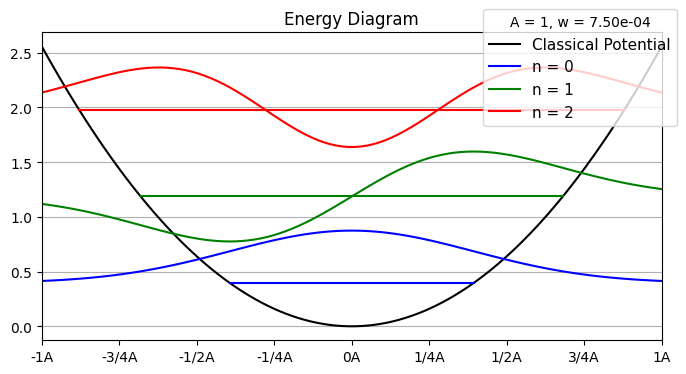

In [67]:
def plotEnergy(n = [0,1,2],w = 0.75e-3,A = 1):
    n = list(n)
    
    fig = plt.figure(figsize = (8,4))
    X = np.linspace(-A,A,100)
    
    plt.plot(X,[V(x,w)*1e37 for x in X],color = "black",label = "Classical Potential")
    plt.xlim(-A,A)
    
    #color_dict = dict(zip(n,random.sample(list(mcolors.BASE_COLORS.values())[:-2],k = len(n))))
    color_dict = dict(zip(n,list(mcolors.BASE_COLORS.values())[:-2][:len(n)]))
    for i in n:
        #plt.axhline(energy(i,w),color = color_dict[i],label = f"n = {i}",linewidth = 0.5)
        plt.plot(V_ivn(i,w),[energy(i,w)*1e37]*2,color = color_dict[i],label = f"n = {i}")
        plt.plot(X,[energy(i,w)*1e37 + 0.4*waveFunction(x,i,w) for x in X],color = color_dict[i])
        

    
    plt.grid(axis = 'y',which = 'both')

    xloc = plt.xticks()[0]
    plt.xticks(ticks = xloc, labels = [f"{Fraction(i)}A" for i in xloc])
    plt.legend(title = f"A = {A}, w = {w:.2e}",fontsize = 11,bbox_to_anchor=(0.7, 1.1), loc='upper left')
    plt.title("Energy Diagram",fontsize = 12)
    #plt.savefig("EnergyDiagram")
    plt.show()

plotEnergy()

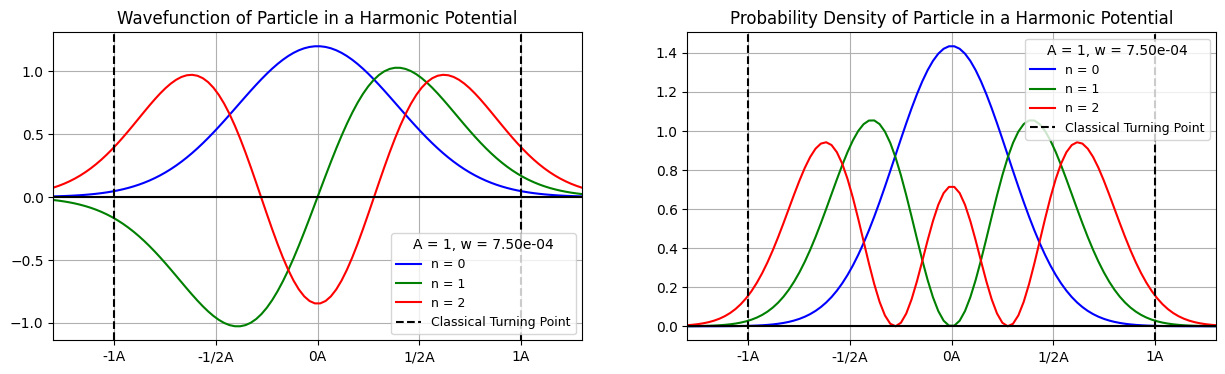

In [68]:
def plotWave(n = [0,1,2],w = 0.75e-3,A = 1):
    fig = plt.figure(figsize = (15,4))
    extnd = 1.3
    X = np.linspace(-extnd*A,extnd*A,100)
    color_dict = dict(zip(n,list(mcolors.BASE_COLORS.values())[:-2][:len(n)]))
    for N in n:
        plt.subplot(1,2,1);
        plt.plot(X,[waveFunction(x,N,w) for x in X],color = color_dict[N], label = f"n = {N}")
        plt.title("Wavefunction of Particle in a Harmonic Potential",fontsize = 12)
        plt.subplot(1,2,2);
        plt.plot(X,[waveFunction(x,N,w)**2 for x in X],color = color_dict[N], label = f"n = {N}")
        plt.title("Probability Density of Particle in a Harmonic Potential",fontsize = 12)
    
    for i in [1,2]:
        plt.subplot(1,2,i)
        
        plt.axhline(color = "black")
        plt.axvline(x = -A,linestyle = "--",color = "black", label = "Classical Turning Point")
        plt.axvline(x = A,linestyle = "--",color = "black")
        plt.grid()
        xloc = plt.xticks()[0]
        
        plt.xticks(ticks = xloc, labels = [f"{Fraction(i)}A" for i in xloc])
        plt.xlim(-extnd*A,extnd*A)
        plt.legend(title = f"A = {A}, w = {w:.2e}",fontsize = 9)
    #plt.savefig("Wavefunction")
    plt.show()

plotWave()

In [69]:
widgets.interactive(plotEnergy,
                    n = widgets.SelectMultiple(
                        options=[0,1,2,3,4,5],
                        value=[0,1,2],
                        rows=4,
                        description='n = ',
                        disabled=False),
                    w = widgets.FloatSlider(
                        value = 0.75e-3,
                        min = 0.5e-3,
                        max = 2e-3,
                        step = 0.25e-3,
                        description = "w = ",
                        readout_format = '.2e'),
                    A = widgets.fixed(1))

interactive(children=(SelectMultiple(description='n = ', index=(0, 1, 2), options=(0, 1, 2, 3, 4, 5), rows=4, …

In [70]:
widgets.interactive(plotWave,
                    n = widgets.SelectMultiple(
                        options=[0,1,2,3,4,5],
                        value=[0,1,2],
                        rows=4,
                        description='n = ',
                        disabled=False),
                    w = widgets.FloatSlider(
                        value = 0.75e-3,
                        min = 0.5e-3,
                        max = 2e-3,
                        step = 0.25e-3,
                        description = "w = ",
                        readout_format = '.2e'),
                    A = widgets.fixed(1))

interactive(children=(SelectMultiple(description='n = ', index=(0, 1, 2), options=(0, 1, 2, 3, 4, 5), rows=4, …

In [64]:
from IPython.display import display

i_n = widgets.SelectMultiple(
    options=[0,1,2,3,4,5],
    value=[0,1,2],
    rows=4,
    description='n = ',
    disabled=False)
i_w = widgets.FloatSlider(
    value = 0.75e-3,
    min = 0.5e-3,
    max = 2e-3,
    step = 0.25e-3,
    description = "w = ",
    readout_format = '.2e')
i_A = widgets.fixed(1)

i_energy = widgets.interactive_output(plotEnergy,{'n': i_n, 'w': i_w, 'A': i_A})
i_wave = widgets.interactive_output(plotWave,{'n': i_n, 'w': i_w, 'A': i_A})

display(i_n,i_w,i_energy,i_wave)

SelectMultiple(description='n = ', index=(0, 1, 2), options=(0, 1, 2, 3, 4, 5), rows=4, value=(0, 1, 2))

FloatSlider(value=0.00075, description='w = ', max=0.002, min=0.0005, readout_format='.2e', step=0.00025)

Output()

Output()